# Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Загрузка данных

In [3]:
data = pd.read_csv('data/sales.csv').rename(columns={"date": "Дата",
                                                     "item_price": "Цена",
                                                     "item_cnt_day": "Количество",
                                                     "item_name": "Товар",
                                                     "item_category_name": "Категория",
                                                     "shop_name": "Магазин"})

In [4]:
data.head()

,Дата,Цена,Количество,Товар,Категория,Магазин
0,01.01.2013,1198.50,1.00,"Need for Speed The Run [PS3, русская версия]",Игры - PS3,"Химки ТЦ ""Мега"""
1,01.01.2013,263.00,1.00,МАДАГАСКАР 3,Кино - DVD,"Казань ТЦ ""Бехетле"""
2,01.01.2013,899.00,1.00,"God of War 3 (Essentials) [PS3, русская версия]",Игры - PS3,"Калуга ТРЦ ""XXI век"""
3,01.01.2013,1599.00,1.00,Фигурка Assassin's Creed Revelations Ezio Audi...,Подарки - Фигурки,"Химки ТЦ ""Мега"""
4,01.01.2013,399.00,1.00,ABBA The Definitive Collection DVD,Музыка - Музыкальное видео,"Москва ТЦ ""МЕГА Теплый Стан"" II"


# Работа с пропущенными/отсутствующими значениями

###### Работа с отсутствующими значениями – одна из самых распространенных проблем очистки, т.к. большинство обучаемых моделей не предполагают работу с ними.
###### Самый простой способ визуализации количества пропущенных значений - вывод в виде списка

In [5]:
for column in data.columns:
    pct_missing = data[column].isnull().sum() #Подправил: вроде так корректнее
    print(f'{column} - {round(pct_missing*100)}%')

Дата - 0%
Цена - 0%
Количество - 0%
Товар - 0%
Категория - 0%
Магазин - 0%


###### В этом наборе данных пропущенные значения отсутствуют, но что делать, если они все таки есть?
###### Существует четыре самых распространенных метода работы с отсутствующими данными:
1. **Отбрасывание записей - удаление записей, в которых процент пропущенных значений больше заданного**
2. **Отбрасывание признаков - удаление признаков, в которых процент пропущенных значений больше заданного**
3. **Внесение недостающих значений - замена недостающих значений (к примеру на среднее значение или медианное значение по признаку)**
4. **Замена недостающих значений - замена недостающих значений на какую-либо константу (к примеру -999 для числовых значений или _MISSING_ для категориальных). В таком случае модель определит эти данные как пропущенные и будет их корректно обрабатывать**


# Удаление выбросов

###### Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками
###### В большинстве случаев аналитики пытаются искать выбросы только в числовых признаках

###### Самым простым способом обнаружения выбросов является описательная статистика данных
###### Как видно из таблицы, к примеру для признака Цена максимальное значение является 307980, когда квантиль (значение, которое заданная случайная величина не превышает с фиксированной вероятностью) равен 999.
###### Так же из таблицы видно что у признака Цена минимальное значение равно -1, чего быть собственно не может. Cоответственно, можно быть уверенным, что в данных есть выбросы, что подтверждается гистограммами распределения значений

In [6]:
data.describe()

,Цена,Количество
count,2935849.00,2935849.00
mean,890.85,1.24
std,1729.80,2.62
min,-1.00,-22.00
25%,249.00,1.00
50%,399.00,1.00
75%,999.00,1.00
max,307980.00,2169.00


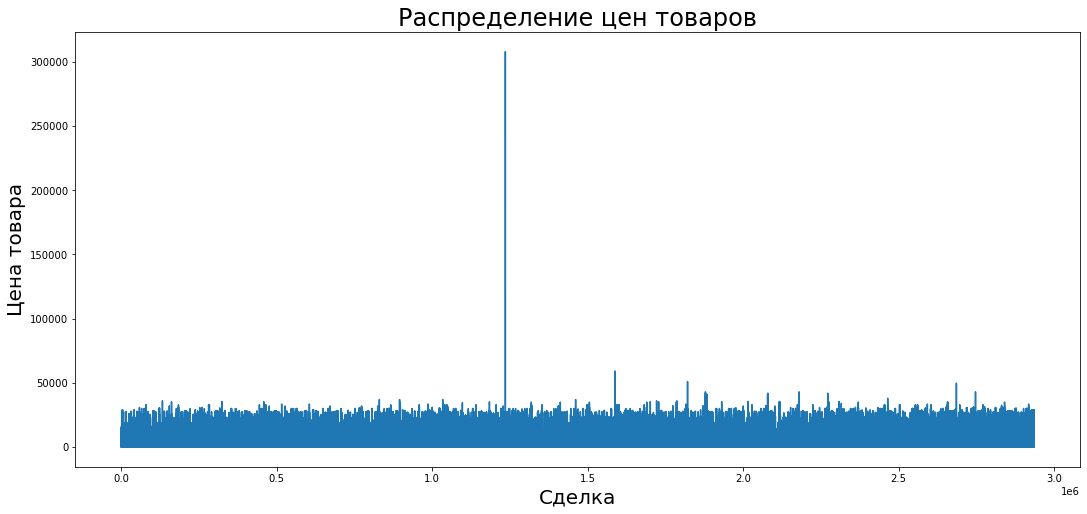

In [7]:
plt.figure(figsize=(18, 8))
plt.xlabel("Сделка", fontsize=20)
plt.ylabel("Цена товара", fontsize=20)
plt.title("Распределение цен товаров", fontsize=24)
plt.plot(data.Цена)

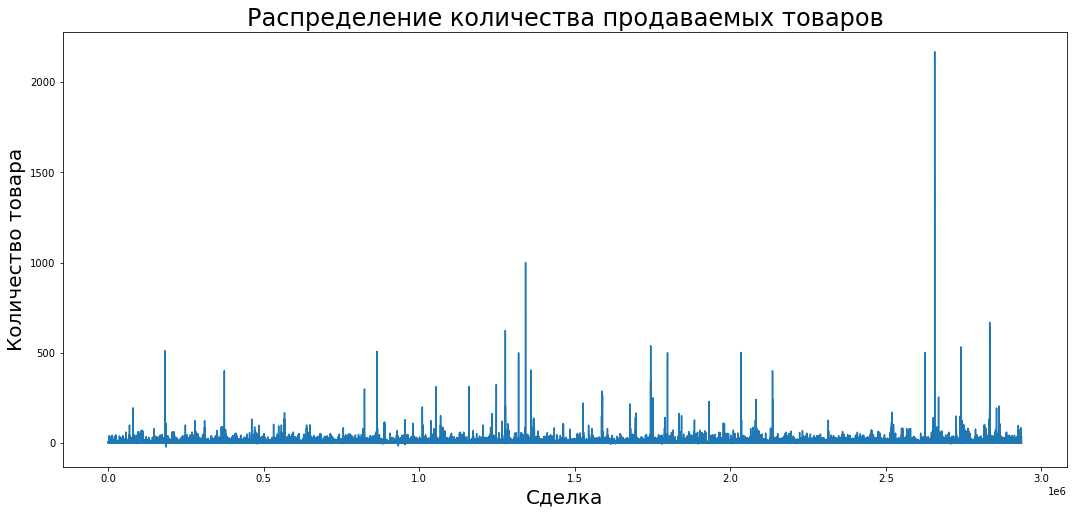

In [8]:
plt.figure(figsize=(18, 8))
plt.xlabel("Сделка", fontsize=20)
plt.ylabel("Количество товара", fontsize=20)
plt.title("Распределение количества продаваемых товаров", fontsize=24)
plt.plot(data.Количество)

###### Самым простым способом очистки данных от выбросов является очистка по квантилю.
###### Чем больше разница между low_value и high_value - тем меньше данных будет удалено

In [9]:
low_value = 0.001
high_value = 0.999
quant_df = data.quantile([low_value, high_value])
for column in quant_df.columns:
    data = data[(data[column] > quant_df.loc[low_value, column]) & (data[column] < quant_df.loc[high_value, column])]

###### После удаления выбросов графики стали более ровными

In [10]:
data.describe()

,Цена,Количество
count,2919448.00,2919448.00
mean,862.89,1.20
std,1493.49,0.96
min,0.20,1.00
25%,249.00,1.00
50%,399.00,1.00
75%,999.00,1.00
max,23989.75,21.00


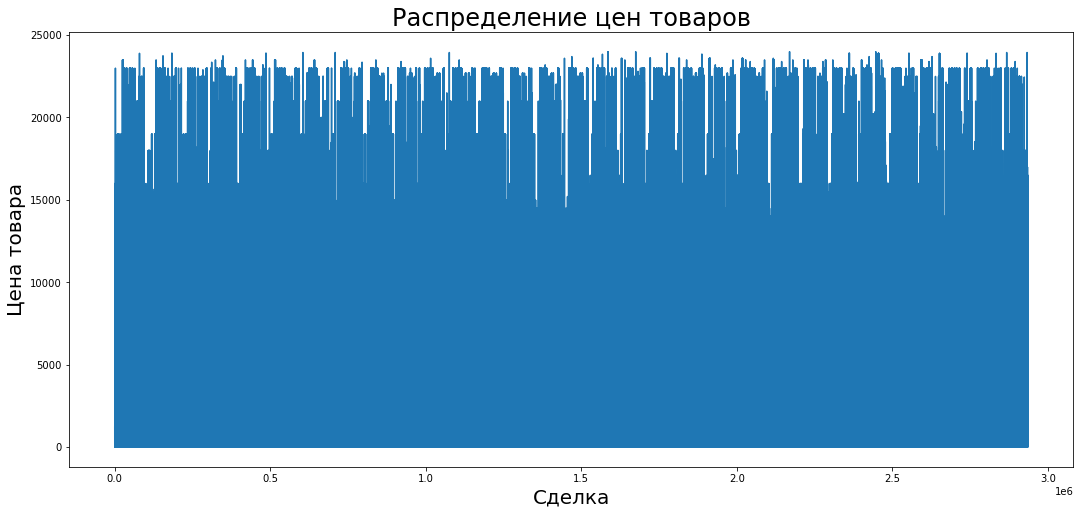

In [11]:
plt.figure(figsize=(18, 8))
plt.xlabel("Сделка", fontsize=20)
plt.ylabel("Цена товара", fontsize=20)
plt.title("Распределение цен товаров", fontsize=24)
plt.plot(data.Цена)

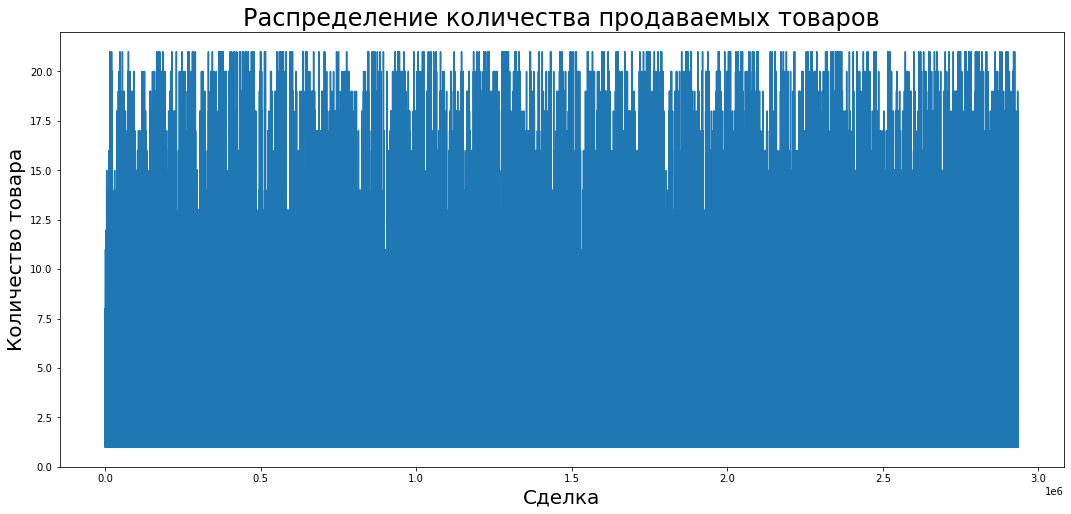

In [12]:
plt.figure(figsize=(18, 8))
plt.xlabel("Сделка", fontsize=20)
plt.ylabel("Количество товара", fontsize=20)
plt.title("Распределение количества продаваемых товаров", fontsize=24)
plt.plot(data.Количество)

# Исправление некорректных значений

###### Ранее мы провели очистку числовых признаков в данных от выбросов, и теперь необходимо проверить, нет ли в категориальных признаках некорректных значений. 

###### Исходя из практики некорректные значения (опечатки) чаще всего встречаются в единичных экземплярах. Т.е. для каждого строкового признака есть смысл проверить значения, которые встречаются редко

In [13]:
data.Категория.value_counts()[data.Категория.value_counts() < 5]

Книги - Путеводители                 3
Книги - Художественная литература    3
PC - Гарнитуры/Наушники              3
Книги - Открытки                     2
Аксессуары - PS2                     2
Игровые консоли - PS2                1
Книги - Познавательная литература    1
Name: Категория, dtype: int64

In [14]:
data.Магазин.value_counts()[data.Магазин.value_counts() < 5]

Series([], Name: Магазин, dtype: int64)

# Кодирование категориальных признаков

###### Значения категориальных признаков определяют факт принадлежности объекта к какой-то категории. Примеры таких признаков: пол, страна проживания, номер группы, и т.п. В нашем случае такими признаками являются: Товар, Категория и Магазин.
###### Для того, чтобы алгоритмы могли правильно обрабатывать такие значения необходимо преобразовать их в какой-либо понятный для ЭВМ вид. 
###### Самым распространенным способом кодирования категориальных признаков является кодирование с помощью LabelEncoder, который каждой категории сопоставляет некоторое целое число

In [15]:
for column in ["Товар", "Категория", "Магазин"]:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [16]:
data.head()

,Дата,Цена,Количество,Товар,Категория,Магазин
0,01.01.2013,1198.50,1.00,5161,19,54
1,01.01.2013,263.00,1.00,13976,40,13
2,01.01.2013,899.00,1.00,3601,19,15
3,01.01.2013,1599.00,1.00,20038,72,54
4,01.01.2013,399.00,1.00,1120,59,28


# Нормализация и стандартизация

###### Чаще всего используется с простыми алгоритмами (только для числовых признаков) для того, чтобы разброс значений разных признаков был cопоставим в абсолютных значениях. Это помогает некоторым моделям более точно предсказывать значения, но следует учитывать, что прежняя читаемость данных для человека при этом теряется 

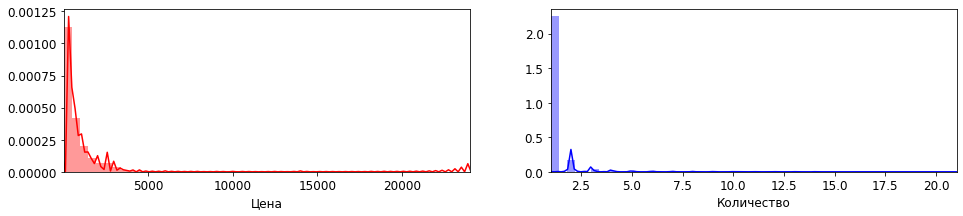

In [17]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(16, 3))

plt.subplot(1,2,1)
plt.xlim(data.Цена.min(), data.Цена.max())
sns.distplot(data.Цена, label='Цена', color='red')

plt.subplot(1,2,2)
plt.xlim(data.Количество.min(), data.Количество.max())
sns.distplot(data.Количество, label='Количество', color='blue', kde_kws = {'bw' : 0.1})

In [18]:
scaler = StandardScaler()
data[['Цена', 'Количество']] = scaler.fit_transform(data[['Цена', 'Количество']])

In [19]:
data.head()

,Дата,Цена,Количество,Товар,Категория,Магазин
0,01.01.2013,0.22,-0.21,5161,19,54
1,01.01.2013,-0.40,-0.21,13976,40,13
2,01.01.2013,0.02,-0.21,3601,19,15
3,01.01.2013,0.49,-0.21,20038,72,54
4,01.01.2013,-0.31,-0.21,1120,59,28


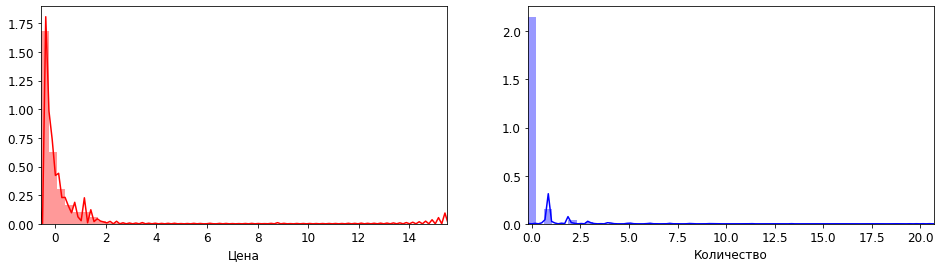

In [20]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.xlim(data.Цена.min(), data.Цена.max())
sns.distplot(data.Цена, label='Цена', color='red')

plt.subplot(1,2,2)
plt.xlim(data.Количество.min(), data.Количество.max())
sns.distplot(data.Количество, label='Количество', color='blue', kde_kws = {'bw' : 0.1})

###### P.S. К каждому набору данных необходимо применять разные подходы, проявлять себя с творческой стороны
###### К очистке данных так же относятся:
1. Удаление неинформативных признаков (к примеру 90% строк содержат одинаковое значение)
2. Удаление нерелевантных признаков (никак не влияют на предсказание результата)
3. Удаление дубликатов
4. Приведение значений категориальных признаков к одному регистру
5. И многое другое